# XAI 3 and deployment

### Exercise 5. Model-agnostic: Partial Dependency Plot (PDP)

#### 1. One dimensional Partial Dependence Plot

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('day.csv')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
features = ['instant', 'temp', 'hum', 'windspeed']
x = df[features]
y = df['cnt']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

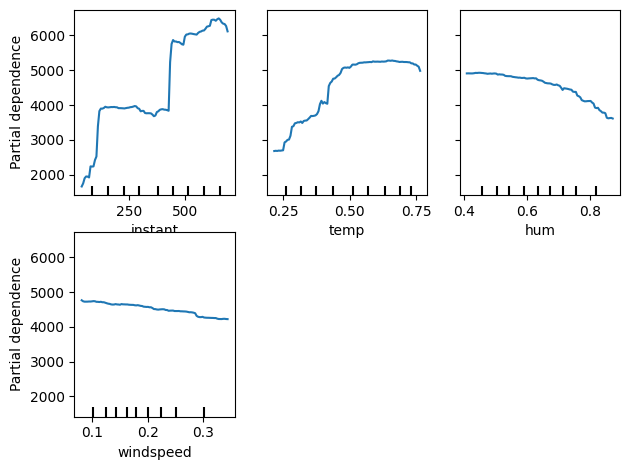

In [9]:
PartialDependenceDisplay.from_estimator(
    model, 
    x_train, 
    features=['instant', 'temp', 'hum', 'windspeed'],
    kind='average'
)
plt.tight_layout()
plt.show()

#### 2. Bidimensional Partial Dependency Plot

In [11]:
sample_df = df.sample(n=500, random_state=42)
x = sample_df[['temp', 'hum']]
y = sample_df['cnt']

In [12]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x, y)

RandomForestRegressor(random_state=42)

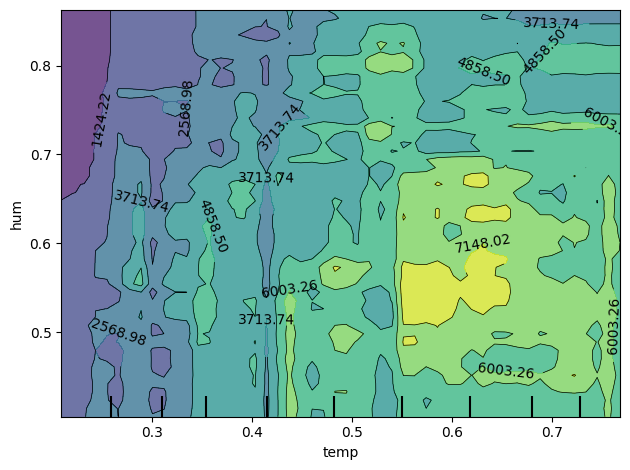

In [13]:
disp = PartialDependenceDisplay.from_estimator(
    model, 
    x, 
    features=[('temp', 'hum')],
    kind='average',
    grid_resolution=50
)
plt.tight_layout()
plt.show()

#### 3. PDP to explain the price of a house.

In [4]:
df1 = pd.read_csv('kc_house_data.csv')
df1_sample = df1.sample(n=1000, random_state=42)

In [6]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']
x = df1_sample[features]
y = df1_sample['price']